In [1]:
import pandas as pd

oct_merged = pd.read_csv('../DATASET/obs_est_merged/oct_merged.csv')

C:\Users\DataScience\AppData\Local\Temp\ipykernel_7980\2923882287.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
oct_merged

,lat,lon,year,month,precip_est,precip_obs,bias_oct
0,45.0,-20.0,1981,11,136.470150,150.665280,-14.195130
1,45.0,-19.0,1981,11,132.524840,139.511110,-6.986270
2,45.0,-18.0,1981,11,128.341250,122.909546,5.431704
3,45.0,-17.0,1981,11,122.454530,117.767334,4.687196
4,45.0,-16.0,1981,11,120.415470,122.222900,-1.807430
...,...,...,...,...,...,...,...
230251,20.0,16.0,2017,4,0.039531,0.114441,-0.074910
230252,20.0,17.0,2017,4,0.039531,0.000000,0.039531
230253,20.0,18.0,2017,4,0.074687,0.057220,0.017467
230254,20.0,19.0,2017,4,0.082500,0.171661,-0.089162


In [3]:
oct_average= oct_merged
oct_average = oct_average.drop(columns=['precip_obs'])
oct_average = oct_average[(oct_average['lon'] >= -18) & (oct_average['lon'] <= 0)]
oct_average = oct_average[(oct_average['lat'] >= 20) & (oct_average['lat'] <= 38)]

In [4]:
oct_average[oct_average['lon'] == -18]

,lat,lon,year,month,precip_est,bias_oct
289,38.0,-18.0,1981,11,64.224060,-22.354310
330,37.0,-18.0,1981,11,60.282658,-19.825982
371,36.0,-18.0,1981,11,54.298283,0.968815
412,35.0,-18.0,1981,11,49.118595,21.530705
453,34.0,-18.0,1981,11,44.833440,18.908757
...,...,...,...,...,...,...
230053,24.0,-18.0,2017,4,4.547344,3.860698
230094,23.0,-18.0,2017,4,3.219219,3.047557
230135,22.0,-18.0,2017,4,1.488750,0.973766
230176,21.0,-18.0,2017,4,1.211406,1.039745


In [5]:
oct_average

,lat,lon,year,month,precip_est,bias_oct
289,38.0,-18.0,1981,11,64.224060,-22.354310
290,38.0,-17.0,1981,11,59.290470,-34.947810
291,38.0,-16.0,1981,11,55.923283,-31.967342
292,38.0,-15.0,1981,11,52.946720,-37.812560
293,38.0,-14.0,1981,11,48.997500,-51.481626
...,...,...,...,...,...,...
230231,20.0,-4.0,2017,4,0.391094,-0.524434
230232,20.0,-3.0,2017,4,0.723125,-0.879048
230233,20.0,-2.0,2017,4,0.824687,-1.292470
230234,20.0,-1.0,2017,4,0.445781,-2.873006


In [6]:
oct_average.describe()

,lat,lon,year,month,precip_est,bias_oct
count,77976.000000,77976.000000,77976.000000,77976.000000,77976.000000,77976.000000
mean,29.000000,-9.000000,1999.166667,5.500000,21.826232,2.987794
std,5.477261,5.477261,10.399052,4.349357,24.393391,26.384423
min,20.000000,-18.000000,1981.000000,1.000000,-0.004160,-630.773292
25%,24.000000,-14.000000,1990.000000,2.000000,1.867173,-0.460557
50%,29.000000,-9.000000,1999.000000,3.500000,8.974951,1.854420
75%,34.000000,-4.000000,2008.000000,11.000000,39.474083,11.414042
max,38.000000,0.000000,2017.000000,12.000000,131.355040,109.941878


In [7]:
oct_ndup = oct_average.drop_duplicates()

In [8]:
len(oct_average.duplicated())

77976

In [9]:
oct_test = oct_average.sort_values(['year', 'month'])
oct_test = oct_average.reset_index(drop=True)

X, y = oct_test[['lat', 'lon', 'month', 'precip_est', 'year']], oct_test['bias_oct'] 
# X = X.sort_values('month')

In [10]:
oct_test

,lat,lon,year,month,precip_est,bias_oct
0,38.0,-18.0,1981,11,64.224060,-22.354310
1,38.0,-17.0,1981,11,59.290470,-34.947810
2,38.0,-16.0,1981,11,55.923283,-31.967342
3,38.0,-15.0,1981,11,52.946720,-37.812560
4,38.0,-14.0,1981,11,48.997500,-51.481626
...,...,...,...,...,...,...
77971,20.0,-4.0,2017,4,0.391094,-0.524434
77972,20.0,-3.0,2017,4,0.723125,-0.879048
77973,20.0,-2.0,2017,4,0.824687,-1.292470
77974,20.0,-1.0,2017,4,0.445781,-2.873006


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Adding a constant to the model (statsmodels does not add a constant by default)
X_train_sm = sm.add_constant(X_train)

# Fit the Ordinary Least Squares model with statsmodels
model = sm.OLS(y_train, X_train_sm)
results = model.fit()

# Get coefficients and p-values
coefficients = results.params
p_values = results.pvalues

# Create a DataFrame for easier visualization
feature_importance = pd.DataFrame({
    'Feature': coefficients.index,
    'Coefficient': coefficients.values,
    'P-Value': p_values.values
})

# Filtering to remove the constant (intercept) term if present
feature_importance = feature_importance[feature_importance['Feature'] != 'const']

display(feature_importance)

,Feature,Coefficient,P-Value
1,lat,-1.334424,0.000000e+00
2,lon,0.020432,3.122837e-01
3,month,-0.721398,1.183377e-208
4,precip_est,0.492407,0.000000e+00
5,year,0.047894,8.869667e-07


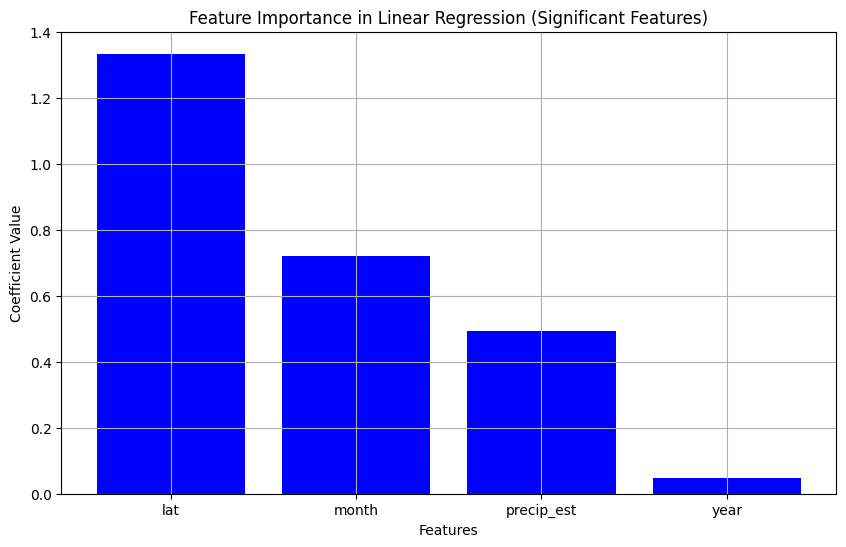

In [16]:
# Sorting the features by the absolute value of their coefficients, considering only significant ones (p < 0.05)
significant_features = feature_importance[feature_importance['P-Value'] < 0.05]
significant_features = significant_features.sort_values(by='Coefficient', key=abs, ascending=False)

# Plotting feature importance for significant features
plt.figure(figsize=(10, 6))
plt.bar(significant_features['Feature'],  abs(significant_features['Coefficient']), color='b')
plt.title('Feature Importance in Linear Regression (Significant Features)')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.grid(True)
plt.show()

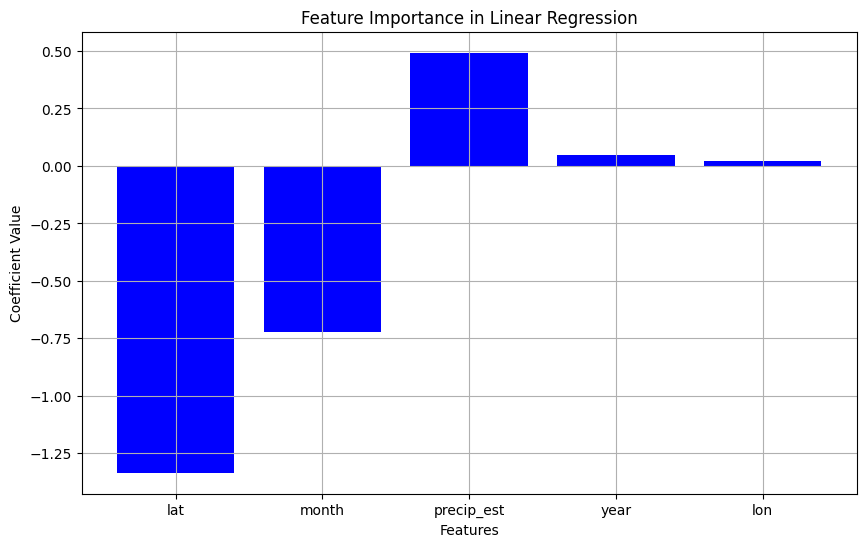

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Get coefficients
coefficients = model.coef_

# Create a DataFrame for easier visualization
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients
})

# Sorting the features by the absolute value of their coefficients
feature_importance = feature_importance.sort_values(by='Coefficient', key=abs, ascending=False)

# Plotting feature importance
plt.figure(figsize=(10, 6))
plt.bar(feature_importance['Feature'], feature_importance['Coefficient'], color='b')
plt.title('Feature Importance in Linear Regression')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.grid(True)
plt.show()

### Model selection

In [12]:
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import TimeSeriesSplit

In [13]:
# # Define the models
# models = {
#     "Linear Regression": LinearRegression(),
#     "XGBoost": XGBRegressor(random_state=42),
#     "Random Forest": RandomForestRegressor(random_state=42),
#     "ExtraTrees Regressor": ExtraTreesRegressor(random_state=42),
#     "LGBM Regressor": LGBMRegressor(random_state=42)
# }
# k = 4
# kf = KFold(n_splits=k)
# results = {}

# for model_name, model in models.items():
#     train_rmse_scores = []
#     test_rmse_scores = []
#     train_r2_scores = []
#     test_r2_scores = []

#     # Note that we pass groups to the split method
#     for train_index, test_index in kf.split(X):
#         x_train_fold, x_test_fold = X.iloc[train_index].drop('year'), X.iloc[test_index].drop('year')

#         print(f'''▶️ X_train{x_train_fold['month'].unique()}
# ▶️ X_test{x_test_fold['month'].unique()}''')
#         print("Train indices:", train_index, "Test indices:", test_index)

#         y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

#         # Train and predict
#         model.fit(x_train_fold, y_train_fold)
#         y_pred_train = model.predict(x_train_fold)
#         y_pred_test = model.predict(x_test_fold)

#         # Calculate RMSE
#         rmse_train = mean_squared_error(y_train_fold, y_pred_train, squared=False)
#         rmse_test = mean_squared_error(y_test_fold, y_pred_test, squared=False)
#         r2_train = r2_score(y_train_fold, y_pred_train)
#         r2_test = r2_score(y_test_fold, y_pred_test)

#         train_rmse_scores.append(rmse_train)
#         test_rmse_scores.append(rmse_test)
#         train_r2_scores.append(r2_train)
#         test_r2_scores.append(r2_test)

#     avg_train_rmse = sum(train_rmse_scores) / k
#     avg_test_rmse = sum(test_rmse_scores) / k
#     avg_train_r2 = sum(train_r2_scores) / k
#     avg_test_r2 = sum(test_r2_scores) / k

#     results[model_name] = {
#         "train_rmse": avg_train_rmse,
#         "test_rmse": avg_test_rmse,
#         "train_r2": avg_train_r2,
#         "test_r2": avg_test_r2
#     }

# # for model_name, metrics in results.items():
# #     print(f"{model_name} - Train RMSE: {metrics['train_rmse']}, Test RMSE: {metrics['test_rmse']}")

In [49]:
# Define the models
models = {
    "Linear Regression": LinearRegression(),
    "XGBoost": XGBRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "ExtraTrees Regressor": ExtraTreesRegressor(random_state=42),
    "LGBM Regressor": LGBMRegressor(random_state=42)
}

k = 5 # 80% 20%
tscv = TimeSeriesSplit(n_splits=5)
results = {}

for model_name, model in models.items():
    train_rmse_scores = []
    test_rmse_scores = []
    train_r2_scores = []
    test_r2_scores = []

    # Note that we pass groups to the split method
    for train_index, test_index in tscv.split(X):
        x_train_fold, x_test_fold = X.iloc[train_index].drop(columns=['year', 'month']), X.iloc[test_index].drop(columns=['year', 'month'])
        # x_train_fold, x_test_fold = X.iloc[train_index], X.iloc[test_index]


#         print(f'''▶️ X_train{x_train_fold['year'].unique()}
# ▶️ X_test{x_test_fold['year'].unique()}''')
        # print("Train indices:", train_index, "Test indices:", test_index)

        y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

        # Train and predict
        model.fit(x_train_fold, y_train_fold)
        y_pred_train = model.predict(x_train_fold)
        y_pred_test = model.predict(x_test_fold)

        # Calculate RMSE
        rmse_train = mean_squared_error(y_train_fold, y_pred_train, squared=False)
        rmse_test = mean_squared_error(y_test_fold, y_pred_test, squared=False)
        r2_train = r2_score(y_train_fold, y_pred_train)
        r2_test = r2_score(y_test_fold, y_pred_test)

        train_rmse_scores.append(rmse_train)
        test_rmse_scores.append(rmse_test)
        train_r2_scores.append(r2_train)
        test_r2_scores.append(r2_test)

    avg_train_rmse = sum(train_rmse_scores) / k
    avg_test_rmse = sum(test_rmse_scores) / k
    avg_train_r2 = sum(train_r2_scores) / k
    avg_test_r2 = sum(test_r2_scores) / k

    results[model_name] = {
        "train_rmse": avg_train_rmse,
        "test_rmse": avg_test_rmse,
        "train_r2": avg_train_r2,
        "test_r2": avg_test_r2
    }

# for model_name, metrics in results.items():
#     print(f"{model_name} - Train RMSE: {metrics['train_rmse']}, Test RMSE: {metrics['test_rmse']}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000175 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 294
[LightGBM] [Info] Number of data points in the train set: 12996, number of used features: 3
[LightGBM] [Info] Start training from score 3.691295
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000231 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 294
[LightGBM] [Info] Number of data points in the train set: 25992, number of used features: 3
[LightGBM] [Info] Start training from score 2.897007
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000334 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2

In [50]:
import plotly.graph_objects as go
import numpy as np
import plotly.io as pio

data = results
models = list(data.keys())
train_rmse = [data[model]['train_rmse'] for model in models]
test_rmse = [data[model]['test_rmse'] for model in models]
train_r2 = [data[model]['train_r2'] for model in models]
test_r2 = [data[model]['test_r2'] for model in models]

train_rmse = [round(num, 2) for num in train_rmse]
test_rmse = [round(num, 2) for num in test_rmse]
train_r2 = [round(num, 2) for num in train_r2]
test_r2 = [round(num, 2) for num in test_r2]

standard_deviation = np.std(y)  # Calculate standard deviation using numpy
sample_size = len(y)  # Calculate sample size

standard_error = standard_deviation / np.sqrt(sample_size)

In [51]:
fig = go.Figure()

# Bar chart for R²
fig.add_trace(go.Bar(
    x=models,
    y=train_r2,
    name='Train R²',
    marker_color='blue',
    text=train_r2,  # Add this line to specify the text for each bar
    # 'auto' places the text inside the bars; you can also use 'outside' or 'inside'
    textposition='auto'
))

fig.add_trace(go.Bar(
    x=models,
    y=test_r2,
    name='Test R²',
    marker_color='red',
    text=test_r2,  # Add this line to specify the text for each bar
    # 'auto' places the text inside the bars; you can also use 'outside' or 'inside'
    textposition='auto'
))

# Update the layout
fig.update_layout(
    barmode='group',
    title='R²',
    xaxis_title='Models',
    yaxis_title='Value',
    legend_title='Data',
    width=600,
    # plot_bgcolor='rgba(0,0,0,0)',  # Set plot background color to transparent
    # paper_bgcolor='rgba(0,0,0,0)'
)

# Show the plot
fig.show()

In [52]:
fig = go.Figure()

# Bar chart for RMSE
fig.add_trace(go.Bar(
    x=models,
    y=train_rmse,
    name='Train RMSE',
    marker_color='blue',
    text=train_rmse,  # Add this line to specify the text for each bar
    # 'auto' places the text inside the bars; you can also use 'outside' or 'inside'
    textposition='auto'
))

fig.add_trace(go.Bar(
    x=models,
    y=test_rmse,
    name='Test RMSE',
    marker_color='red',
    text=test_rmse,  # Add this line to specify the text for each bar
    # 'auto' places the text inside the bars; you can also use 'outside' or 'inside'
    textposition='auto'
))
# Update the layout
fig.update_layout(
    barmode='group',
    title='RMSE',
    xaxis_title='Models',
    yaxis_title='Value',
    legend_title='Data',
    width=600,
    # plot_bgcolor='rgba(0,0,0,0)',  # Set plot background color to transparent
    # paper_bgcolor='rgba(0,0,0,0)'
)

# # Line chart for std
# fig.add_trace(go.Scatter(
#     x=models,
#     y=[stdev for model in models],
#     mode='lines+markers',
#     name='Std',
#     line=dict(color='green', width=2)
# ))

# Line chart for std
fig.add_trace(go.Scatter(
    x=models,
    y=[standard_deviation for i in range(len(models))],
    mode='lines+markers',
    name='Std',
    line=dict(color='orange', width=2)
))
fig.show()

### Hyperparams tuning

In [59]:
# from xgboost import XGBRegressor
# from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
# from sklearn.metrics import make_scorer, mean_squared_error

# # Define your model
# xgb = LGBMRegressor(random_state=42)

# # Define the parameter grid
# param_grid = {
#     'num_leaves': [31, 41, 51],  # Increase in steps to see the effect
#     'max_depth': [5, 10, 15],  # Adjust based on the complexity of the problem
#     'learning_rate': [0.01, 0.05],  # Small steps to see incremental benefits
#     'n_estimators': [100, 200],  # More trees can be better, but watch for overfitting
#     'subsample': [0.8, 0.9, 1.0],  # Typical subsampling rates
#     'min_child_samples': [20, 30, 40]  # Increasing it can combat overfitting
# }

# # Setup the scoring function
# scorer = make_scorer(mean_squared_error, greater_is_better=False, squared=False)

# #Setup the GroupKFold
# tscv = TimeSeriesSplit(n_splits=3)  # Adjust the number of splits as necessary

# # Setup GridSearchCV with GroupKFold
# grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring=scorer, cv=tscv, verbose=2)

# # Fit the model using groups
# grid_search.fit(X.drop(columns=['month']), y)

# # Get the best estimator and its parameters
# best_xgb = grid_search.best_estimator_
# best_params = grid_search.best_params_

# print("Best parameters:", best_params)
# print("Best RMSE:", -grid_search.best_score_)  # Note: 'best_score_' is negative, so take the negative of it

# # Optionally, use the best model to make predictions or further analysis
# # predictions = best_xgb.predict(X_test)
# # rmse = np.sqrt(mean_squared_error(y_test, predictions))
# # print("Test RMSE:", rmse)

In [90]:
# from bayes_opt import BayesianOptimization
# from lightgbm import LGBMRegressor
# from sklearn.model_selection import TimeSeriesSplit, cross_val_score
# import numpy as np

# # Assume 'X' and 'y' are your feature matrix and target variable
# kf = KFold(n_splits=4)

# # Define your LGBM training function
# def LGBM_evaluate(max_depth, n_estimators, learning_rate, colsample_bytree, subsample):
#     params = {
#         'max_depth': int(max_depth),
#         'n_estimators': int(n_estimators),
#         'learning_rate': learning_rate,
#         'colsample_bytree': colsample_bytree,
#         'subsample': subsample,
#         'random_state': 42
#     }
#     lgbm = LGBMRegressor(**params)
#     # Ensure that X is prepared without needing to drop columns as in your example
#     cv_scores = cross_val_score(lgbm, X, y, cv=kf, scoring='neg_root_mean_squared_error')
#     return np.mean(cv_scores)

# # Set up Bayesian Optimization
# optimizer = BayesianOptimization(
#     f=LGBM_evaluate,
#     pbounds={
#         'max_depth': (1, 15),
#         'n_estimators': (50, 150),
#         'learning_rate': (0.01, 0.2),
#         'colsample_bytree': (0.5, 1.0),
#         'subsample': (0.5, 1.0)
#     },
#     random_state=42
# )

# # Run optimization
# optimizer.maximize(init_points=10, n_iter=70)

# # Print best parameters
# print("Best parameters:", optimizer.max['params'])

|   iter    |  target   | colsam... | learni... | max_depth | n_esti... | subsample |
-------------------------------------------------------------------------------------
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000354 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 301
[LightGBM] [Info] Number of data points in the train set: 58482, number of used features: 4
[LightGBM] [Info] Start training from score 5.063451
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may 

In [91]:
# from bayes_opt import BayesianOptimization
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import TimeSeriesSplit, cross_val_score
# import numpy as np

# # Assume 'y' is your target variable
# tscv = TimeSeriesSplit(n_splits=3) 
# # Define your RandomForest training function
# def RF_evaluate(max_depth, n_estimators, min_samples_split, min_samples_leaf):
#     params = {
#         'max_depth': int(max_depth),
#         'n_estimators': int(n_estimators),
#         'min_samples_split': int(min_samples_split),
#         'min_samples_leaf': int(min_samples_leaf),
#         'random_state': 42
#     }
#     rf = RandomForestRegressor(**params)
#     cv_scores = cross_val_score(rf, X.drop(columns=['month']), y, cv=tscv, scoring='neg_root_mean_squared_error')
#     return np.mean(cv_scores)

# # Set up Bayesian Optimization
# optimizer = BayesianOptimization(
#     f=RF_evaluate,
#     pbounds={
#         'max_depth': (1, 15),
#         'n_estimators': (50, 150),
#         'min_samples_split': (2, 10),
#         'min_samples_leaf': (1, 4)
#     },
#     random_state=42
# )

# # Run optimization
# optimizer.maximize(init_points=10, n_iter=70)

# # Print best parameters
# print("Best parameters:", optimizer.max['params'])

In [18]:
best_params_xgb = {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.8}
best_params_rf = {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
# Create Extra Trees model using the best parameters
# best_model = XGBRegressor(**best_params_xgb, random_state=42)
# best_model = RandomForestRegressor(**best_params_rf, random_state=42)
best_model = LGBMRegressor(random_state=42)

In [19]:
oct_average

,lat,lon,year,month,precip_est,bias_oct
289,38.0,-18.0,1981,11,64.224060,-22.354310
290,38.0,-17.0,1981,11,59.290470,-34.947810
291,38.0,-16.0,1981,11,55.923283,-31.967342
292,38.0,-15.0,1981,11,52.946720,-37.812560
293,38.0,-14.0,1981,11,48.997500,-51.481626
...,...,...,...,...,...,...
230231,20.0,-4.0,2017,4,0.391094,-0.524434
230232,20.0,-3.0,2017,4,0.723125,-0.879048
230233,20.0,-2.0,2017,4,0.824687,-1.292470
230234,20.0,-1.0,2017,4,0.445781,-2.873006


In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X.drop(columns=['year', 'month']), y, test_size=0.2, random_state=42)

best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000740 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 294
[LightGBM] [Info] Number of data points in the train set: 62380, number of used features: 3
[LightGBM] [Info] Start training from score 3.008781


In [35]:
oct_test.columns

Index(['lat', 'lon', 'year', 'month', 'precip_est', 'bias_oct'], dtype='object')

In [54]:
oct_final = pd.DataFrame({
    'bias_test': y_test,
    'bias_pred': y_pred,
    'lat': X_test['lat'],
    'lon': X_test['lon'],
    'month': oct_test.loc[X_test.index, 'month'],  # Extract 'month' from the original DataFrame using the indices of X_test
    'prec_est': X_test['precip_est'],
    'corrected_prec': X_test['precip_est'] - y_pred
})

# Reset index of the oct_final DataFrame if needed for clean output
oct_final.reset_index(drop=True, inplace=True)

In [55]:
oct_final

,bias_test,bias_pred,lat,lon,month,prec_est,corrected_prec
0,0.369538,-0.670557,26.0,-1.0,1,0.369538,1.040095
1,1.994721,-0.008064,26.0,-7.0,1,1.994721,2.002785
2,36.850997,-2.435933,37.0,-7.0,2,51.297256,53.733189
3,-27.132019,-35.903321,34.0,-4.0,11,16.439453,52.342774
4,2.157362,-0.222417,28.0,-10.0,12,3.164442,3.386859
...,...,...,...,...,...,...,...
15591,-11.645460,11.658641,36.0,-6.0,12,113.644460,101.985819
15592,-8.797730,-25.850255,34.0,-4.0,3,33.659850,59.510105
15593,24.589799,12.463901,30.0,-15.0,12,32.955430,20.491529
15594,38.462360,27.727757,37.0,-7.0,12,81.156450,53.428693


In [56]:
import numpy as np

def calculate_rmse(group):
    return np.sqrt(mean_squared_error(group['bias_test'], group['bias_pred']))

oct_rmse_ml = oct_final.groupby('month').apply(calculate_rmse).reset_index(name='RMSE')

C:\Users\DataScience\AppData\Local\Temp\ipykernel_32856\200919702.py:6: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [57]:
oct_rmse_ml

,month,RMSE
0,1,24.690320
1,2,18.647848
2,3,16.647167
3,4,16.447901
4,11,33.587588
5,12,25.822493


In [58]:
oct_rmse_ml.to_csv('../DATASET/dataset_test2023/oct_rmse_ml.csv')

In [59]:
## testing set
oct_sub = pd.read_csv ('../DATASET/dataset_test2023/oct23.csv')
X_sub = oct_sub[['lat', 'lon', 'prec_est']]

y_sub = best_model.predict(X_sub)
# oct_sub

In [60]:
submission_oct = pd.DataFrame({ # Example: creating a sequence of IDs from 1 to 781
    'bias': y_sub,
    'lat': oct_sub['lat'],
    'lon': oct_sub['lon'],
    'month': oct_sub['month'],
    'prec_est': oct_sub['prec_est'],
    'corrected_prec': oct_sub['prec_est'] - y_sub
})

In [61]:
submission_oct[submission_oct['corrected_prec'] < 0].count()

bias              285
lat               285
lon               285
month             285
prec_est          285
corrected_prec    285
dtype: int64

In [62]:
submission_oct.loc[submission_oct['corrected_prec'] < 0, 'corrected_prec'] = 0

In [63]:
submission_oct[submission_oct['corrected_prec'] < 0].count()

bias              0
lat               0
lon               0
month             0
prec_est          0
corrected_prec    0
dtype: int64

In [64]:
# from sklearn.model_selection import TimeSeriesSplit
# from sklearn.metrics import mean_squared_error
# import numpy as np

# final_results = {}

# # Define the number of splits
# tscv = TimeSeriesSplit(n_splits=5)

# # You can iterate over the splits
# for train_index, test_index in tscv.split(X):
#     # Use .iloc for positional indexing
#     x_train_fold, x_test_fold = X.iloc[train_index].drop(columns=['month']), X.iloc[test_index].drop(columns=['month'])
#     y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

#     best_model.fit(x_train_fold, y_train_fold)
#     y_pred_train = best_model.predict(x_train_fold)
#     y_pred_test = best_model.predict(x_test_fold)

#     rmse_train = mean_squared_error(
#         y_train_fold, y_pred_train, squared=False)
#     rmse_test = mean_squared_error(y_test_fold, y_pred_test, squared=False)

#     train_rmse_scores.append(rmse_train)
#     test_rmse_scores.append(rmse_test)

# avg_train_rmse = sum(train_rmse_scores) / k
# avg_test_rmse = sum(test_rmse_scores) / k

# final_results["metrics"] = {
#     "RMSE train": avg_train_rmse,
#     "RMSE test": avg_test_rmse,
# }
# print(final_results)

In [ ]:
# rmse = np.sqrt(mean_squared_error(test['bias_dec'], y_sub))